In [1]:
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib as cm

In [2]:
os.chdir(r'Fish_Dataset/Fish_Dataset')

In [3]:
fishes=os.listdir()

In [4]:
dic_fishes={}
count=0
for fish in fishes:
    dic_fishes[fish]=count
    count+=1
dic_fishes

{'Black_Sea_Sprat': 0,
 'Gilt_Head_Bream': 1,
 'Hourse_Mackerel': 2,
 'Red_Mullet': 3,
 'Red_Sea_Bream': 4,
 'Sea_Bass': 5,
 'Shrimp': 6,
 'Striped_Red_Mullet': 7,
 'Trout': 8}

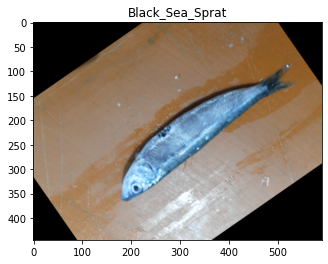

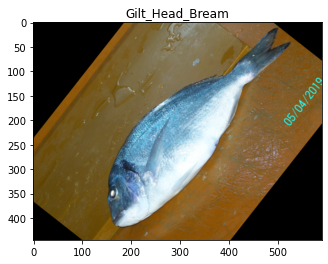

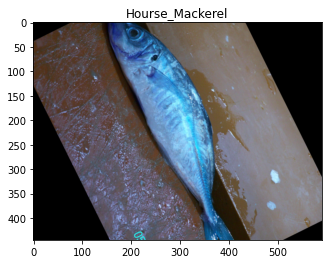

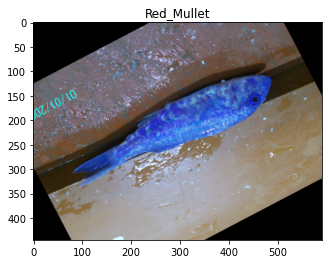

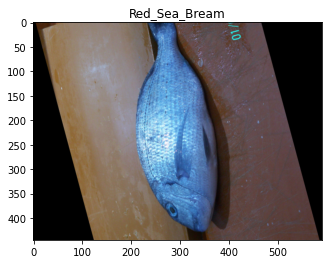

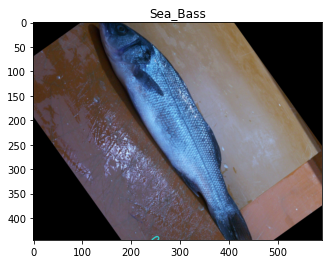

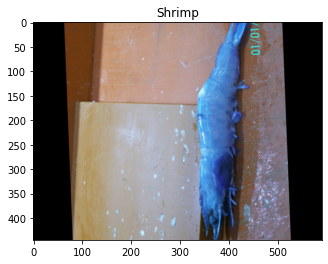

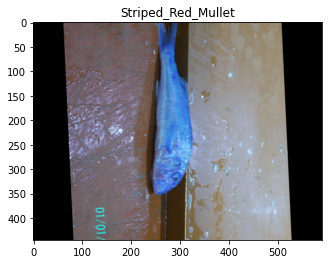

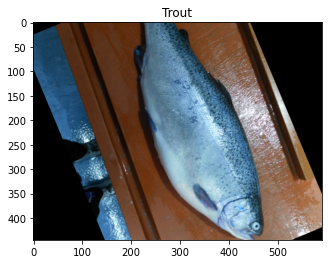

In [5]:
for key in dic_fishes:
    os.chdir(key)
    os.chdir(key)
    
    img=cv2.imread("00001.png")
    plt.imshow(img)
    plt.title(key)
    plt.show()
    os.chdir("..")
    os.chdir("..")


In [6]:
os.getcwd()

'c:\\Users\\thoma\\info\\ml\\Fish\\Fishes\\Fishes\\Fish_Dataset\\Fish_Dataset'

# Création du Dataframe

In [7]:
X=[]
Y=[]
for fish in (fishes):
    os.chdir(fish)
    os.chdir(fish)
    pictures=os.listdir()
    for picture in pictures:
        Y.append(float(dic_fishes[fish]))
        img=cv2.imread(picture)/255 #Normalization of the pictures
        res=cv2.resize(img, dsize=(100, 75), interpolation=cv2.INTER_CUBIC) #reducing the size of images increases the speed of the training 
        X.append(res)
    os.chdir("..")
    os.chdir("..")

I could have use the preprocessing functions of Keras, it would have been easier

In [8]:
os.listdir()

['Black_Sea_Sprat',
 'Gilt_Head_Bream',
 'Hourse_Mackerel',
 'Red_Mullet',
 'Red_Sea_Bream',
 'Sea_Bass',
 'Shrimp',
 'Striped_Red_Mullet',
 'Trout']

In [9]:
X=np.array(X)
Y=np.array(Y)

In [10]:
len(X[0])

75

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


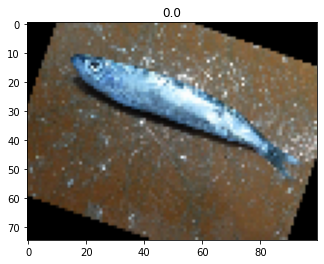

In [11]:
plt.imshow(X[998])
plt.title(str(Y[998]))
plt.show()

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.55) #I have tested several test_size, this one is the best to avoid overfitting

In [13]:
model=keras.Sequential([
        layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu",input_shape=[75,100,3]),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dropout(0.3),
        
        layers.Dense(units=256,activation="relu"),
        layers.Dense(units=9,activation="softmax")]

)

In [14]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics="sparse_categorical_accuracy")

In [15]:
model.fit(X_train,Y_train,epochs=4,validation_data=(X_test,Y_test)) #I have been testing several epochs but this one avoids overfitting

Epoch 1/4
127/127 [==============================] - 201s 2s/step - loss: 2.5439 - sparse_categorical_accuracy: 0.7158 - val_loss: 1.5505 - val_sparse_categorical_accuracy: 0.7194
Epoch 2/4
127/127 [==============================] - 137s 1s/step - loss: 0.1056 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.9471 - val_sparse_categorical_accuracy: 0.8992
Epoch 3/4
127/127 [==============================] - 120s 950ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9822 - val_loss: 2.0563 - val_sparse_categorical_accuracy: 0.5606
Epoch 4/4
127/127 [==============================] - 125s 990ms/step - loss: 0.0902 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.3237 - val_sparse_categorical_accuracy: 0.9018


In [16]:
model.evaluate(X_test,Y_test)

155/155 [==============================] - 40s 145ms/step - loss: 0.3237 - sparse_categorical_accuracy: 0.9018


[0.3236929774284363, 0.9018181562423706]

In [18]:
os.chdir(r"../..")

In [19]:
os.listdir()

['.git', 'Classifier.ipynb', 'data', 'Fish_Dataset', 'test.jpg']

In [23]:
img=cv2.imread("test.jpg")#Picture of a trout
res=cv2.resize(img, dsize=(100, 75), interpolation=cv2.INTER_CUBIC)
model.predict(np.array([res]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

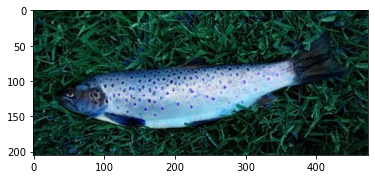

In [24]:
plt.imshow(img)